In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Preprocessing data

In [229]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [230]:
x_train[12]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  12,  99,  91, 142, 155, 246, 182, 155, 155, 155,
        155, 131,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

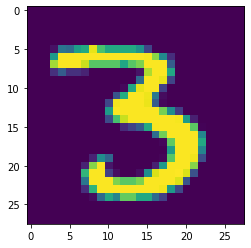

In [231]:
plt.imshow(x_train[12])

Normalize data

In [232]:
x_train, x_test = x_train/255., x_test/255.

In [233]:
x_train[12]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

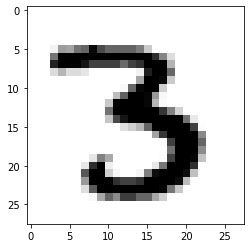

In [268]:
plt.imshow(x_train[12],cmap=plt.cm.binary)

In [234]:
x_train[0].dtype

dtype('float64')

In [235]:
x_train[0].shape

(28, 28)

### Modeling

The batch size defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. 

In [236]:
tf.random.set_seed(42)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax') #output
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=.001),
                metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
938/938 [==============================] - 3s 1ms/step - loss: 0.3037 - accuracy: 0.9148
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1373 - accuracy: 0.9602
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0937 - accuracy: 0.9730
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0699 - accuracy: 0.9792
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0547 - accuracy: 0.9839
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0439 - accuracy: 0.9872
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0350 - accuracy: 0.9897
Epoch 8/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0289 - accuracy: 0.9916
Epoch 9/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0231 - accuracy: 0.9933
Epoch 10/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0206 - accuracy: 0.9937

In [237]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [238]:
model.evaluate(x_test,y_test,batch_size=64)

157/157 [==============================] - 0s 1ms/step - loss: 0.0768 - accuracy: 0.9786


[0.07678156346082687, 0.978600025177002]

<AxesSubplot:>

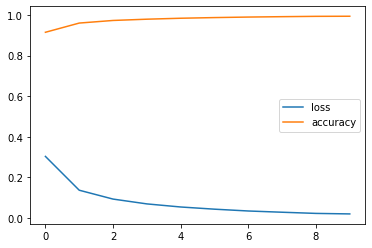

In [239]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [240]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)


In [241]:
import random
def RandomSet(test_data,y_test,y_pred):
    plt.figure(figsize=(5,5))
    for i in range(1,5):
        ax = plt.subplot(2,2,i)
        index = random.choice(range(len(test_data)))

        if y_test[index] == y_pred[index] :
            cmap = plt.cm.Blues
            color = 'blue' 
        else :
            cmap =  plt.cm.Reds
            color = 'red' 

        plt.imshow(test_data[index],cmap=cmap)
        plt.title(y_pred[index],color=color)
        plt.axis(False) # Remove Axis x and y

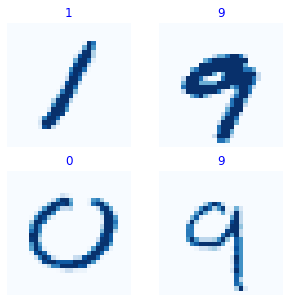

In [243]:
RandomSet(x_test,y_test,y_pred)

### Find ideal learning rate

In [244]:

tf.random.set_seed(42)
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax') #output
])

model_2.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=.0001),
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/5))

history = model_2.fit(x_train,y_train,epochs=20,batch_size=64,callbacks=[lr_scheduler])

Epoch 1/20
938/938 [==============================] - 2s 1ms/step - loss: 0.7732 - accuracy: 0.8119 - lr: 1.0000e-04
Epoch 2/20
938/938 [==============================] - 1s 1ms/step - loss: 0.3214 - accuracy: 0.9128 - lr: 1.5849e-04
Epoch 3/20
938/938 [==============================] - 1s 1ms/step - loss: 0.2419 - accuracy: 0.9339 - lr: 2.5119e-04
Epoch 4/20
938/938 [==============================] - 1s 1ms/step - loss: 0.1866 - accuracy: 0.9471 - lr: 3.9811e-04
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1437 - accuracy: 0.9588 - lr: 6.3096e-04
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1103 - accuracy: 0.9673 - lr: 0.0010
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0891 - accuracy: 0.9732 - lr: 0.0016
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0819 - accuracy: 0.9742 - lr: 0.0025
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.

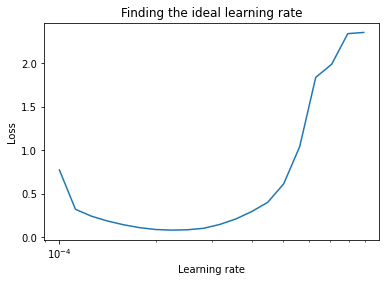

In [245]:
lrs = 1e-4 * (10**(np.arange(20)/20))
plt.semilogx(lrs, history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

ideal learning rate about 0.0001 - 0.0002

In [246]:
tf.random.set_seed(42)
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax') #output
])

model_3.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.0002),
                metrics=['accuracy'])

history = model_3.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5601 - accuracy: 0.8570
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2656 - accuracy: 0.9269
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2139 - accuracy: 0.9412
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1806 - accuracy: 0.9491
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1569 - accuracy: 0.9555
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1379 - accuracy: 0.9610
Epoch 7/10
938/938 [==============================] - 1s 2ms/step - loss: 0.1228 - accuracy: 0.9653
Epoch 8/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1102 - accuracy: 0.9693
Epoch 9/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0994 - accuracy: 0.9722
Epoch 10/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0905 - accuracy: 0.9752

In [247]:
model_3.evaluate(x_test,y_test,batch_size=64)

157/157 [==============================] - 0s 1ms/step - loss: 0.1034 - accuracy: 0.9689


[0.10339514166116714, 0.9689000248908997]

In [248]:
y_prob = model_3.predict(x_test)
y_pred = y_prob.argmax(axis=1)

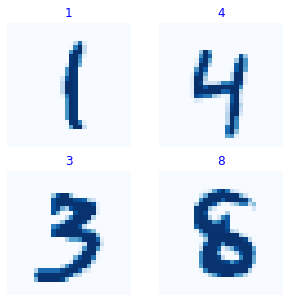

In [251]:
RandomSet(x_test,y_test,y_pred)

### Prediction other image

In [333]:
import cv2

def Prediction(model,path):
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = img/255.
    imgarr = tf.abs(tf.ones_like(img) - img)
    imgarr = tf.reshape(imgarr,(1,28,28))
    prediction = model.predict(imgarr)
    label = prediction.argmax()

    imgarr = tf.reshape(imgarr,(28,28))
    plt.imshow(imgarr,cmap=plt.cm.viridis)
    plt.title(label)
    plt.axis('off')

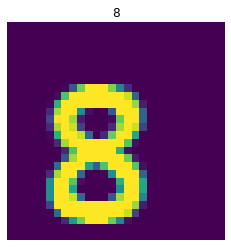

In [334]:
Prediction(model_3,'8.png')